In [283]:
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize


from os import listdir
from os.path import isfile, join
mypath = 'product_data/'
onlyfiles = [json.load(open(mypath+f)) for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles2 = [json_normalize(f['results']) for f in onlyfiles]
df_prods = pd.concat(onlyfiles2)
df_prods.columns.values

In [292]:
df_prods.fillna(0)

,Sort,attributes.ALKPI.value.type,attributes.ALKPI.value.value,attributes.APPROVED_ATTRIBUTES.value.type,attributes.APPROVED_ATTRIBUTES.value.value,attributes.AVITAM.value.type,attributes.AVITAM.value.value,attributes.B12VIT.value.type,attributes.B12VIT.value.value,attributes.B6VITA.value.type,...,popularity,pricingUnit,resourceType,segment.finnish,segment.id,subcategory.finnish,subcategory.id,urlSlug,prices,EAN
0,"[1, 1, 674.5]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,674.500000,kpl,product,Kääreelliset pussit,4256,Karkkipussit,351,omar-pussi-220g-6411401035890,27,6411401035890
1,"[1, 1, 427.6]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,427.600006,kpl,product,Kääreelliset pussit,4256,Karkkipussit,351,fazerin-parhain-220g-taytekaramelli-6411401035807,45,6411401035807
2,"[1, 1, 151.3]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,151.300003,kpl,product,Maksamakkarat ja pasteijat,1204,Leikkeleet,135,snellman-maalaismaksapasteija-200g-6409620029509,47,6409620029509
3,"[1, 1, 30.8]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,30.799999,kpl,product,"Pyörykät, pihvit, puikot, kääryleet",1310,"Pihvit, puikot, pyörykät ja ohukaiset",208,korpela-broilerpyorykat-350g-gluteeniton-64079...,42,6407970095205
4,"[1, 1, 17.5]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,17.500000,kpl,product,"Pyörykät, pihvit, puikot, kääryleet",1310,"Pihvit, puikot, pyörykät ja ohukaiset",208,korpela-lihapyorykat-350g-gluteeniton-64079700...,11,6407970095106
5,"[1, 1, 15.3]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,15.300000,kg,product,Tumma palaleipä,1401,Tuore leipä,110,elonen-100-ruisruutu-6kpl330g-6410580000910,44,6410580000910
6,"[1, 1, 14.7]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,14.700000,kpl,product,Tomaattimurska ja -pyre,3220,"Tomaatti-, vihannes- ja sienisäilykkeet",314,biona-luomu-paseerattu-tomaatti-680g-503272230...,5,5032722301030
7,"[1, 1, 10.4]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,10.400000,kpl,product,Muu täysmehu lämmin,3339,Mehut,403,kaskein-puolukkataysmehu-05l-luomu-6427401257002,7,6427401257002
8,"[1, 1, 6.5]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,6.500000,kg,product,Kausikoristeet,7397,Kodintekstiili ja sisustus,617,weiste-kidepunos-90mmx2m-valkhopea-6412740067511,25,6412740067511
9,"[1, 1, 6.3]",0,0.0,string,BASIC,0,0.0,0,0.0,0,...,6.300000,kpl,product,Tomaattimurska ja -pyre,3220,"Tomaatti-, vihannes- ja sienisäilykkeet",314,biona--luomu-tomaattipyre-200g-5032722301061,47,5032722301061


In [293]:
mypath = 'customer/'
onlyfiles = [pd.read_csv(open(mypath+f)) for f in listdir(mypath) if isfile(join(mypath, f))]
df_customer = pd.concat(onlyfiles)

df_customer = df_customer.reset_index(drop=True)
df_prods = df_prods.reset_index(drop=True)
df_prods["prices"]=np.random.randint(1, 50, df_prods.shape[0])

df_prods['EAN']=df_prods['ean'].apply(int)
df_prods.rename(index=str, columns={"ean":"EAN"})
df_customer['EAN']=df_customer['EAN'].apply(int)

df = pd.merge(df_customer,df_prods, on='EAN', how='left')

In [290]:
for i in df_prods.columns:
    print(i)

Sort
attributes.ALKPI.value.type
attributes.ALKPI.value.value
attributes.APPROVED_ATTRIBUTES.value.type
attributes.APPROVED_ATTRIBUTES.value.value
attributes.AVITAM.value.type
attributes.AVITAM.value.value
attributes.B12VIT.value.type
attributes.B12VIT.value.value
attributes.B6VITA.value.type
attributes.B6VITA.value.value
attributes.BIOTII.value.type
attributes.BIOTII.value.value
attributes.BREIT.value.type
attributes.BREIT.value.value
attributes.CAUTIONARY_INSTRUCTIONS.value.type
attributes.CAUTIONARY_INSTRUCTIONS.value.value
attributes.CVITAM.value.type
attributes.CVITAM.value.value
attributes.DVITAM.value.type
attributes.DVITAM.value.value
attributes.EAN11.value.type
attributes.EAN11.value.value
attributes.ENERKC.value.type
attributes.ENERKC.value.value
attributes.ENERKJ.value.type
attributes.ENERKJ.value.value
attributes.EVITAM.value.type
attributes.EVITAM.value.value
attributes.FLUORI.value.type
attributes.FLUORI.value.value
attributes.FOOLIH.value.type
attributes.FOOLIH.value.val

In [291]:
df.to_csv("final_data.csv", sep=",")

In [296]:
df

,Receipt,TransactionDate,BeginHour,EAN,Quantity,PersonAgeGrp,KCustomer,QualClass,EasyClass,CustomerID,...,pictureUrls,popularity,pricingUnit,resourceType,segment.finnish,segment.id,subcategory.finnish,subcategory.id,urlSlug,prices
0,14727261,2017-01-01,19,5201309608071,2.000,18-24,6711,Q_1-3,E_1-3,0,...,[{'original': 'https://public.keskofiles.com/f...,0.000000,kpl,product,"Ulkomainen lager-olut enint. 5,5 % plo",5230,Oluet,905,mythos-lager-olut-47-033l-klp-5201309608071,17.0
1,14727261,2017-01-01,19,6413605055698,1.000,18-24,6711,Q_1-3,E_1-3,0,...,[{'original': 'https://public.keskofiles.com/f...,0.000000,kpl,product,"Lonkero greippi enint. 5,5 % plo/tlk mon",5121,Lonkerot,901,cool-grape-47-033l-tlk-12-pack-dolly-641360505...,49.0
2,14727261,2017-01-01,19,6408640995924,2.000,18-24,6711,Q_1-3,E_1-3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14727261,2017-01-01,19,6410405046420,2.000,18-24,6711,Q_1-3,E_1-3,0,...,[{'original': 'https://public.keskofiles.com/f...,986.799988,kpl,product,Muovikassit,6126,NaN,NaN,pirkka-kierratysmuovikassi-harmaa-40l-64104050...,7.0
4,14727261,2017-01-01,19,7310532106563,1.000,18-24,6711,Q_1-3,E_1-3,0,...,[{'original': 'https://public.keskofiles.com/f...,0.000000,kpl,product,Maustetut perunalastut,4301,Sipsit ja muut naposteltavat,359,estrella-275g-tzatziki-chips-7310532106563,20.0
5,14727261,2017-01-01,19,6415600503655,1.000,18-24,6711,Q_1-3,E_1-3,0,...,[{'original': 'https://public.keskofiles.com/f...,284.799988,kpl,product,Urheilujuomat,5044,Energiajuomat,406,powerade-ion4-mountain-blast-05l-kmp-641560050...,24.0
6,14727261,2017-01-01,19,6408640969185,1.000,18-24,6711,Q_1-3,E_1-3,0,...,[{'original': 'https://public.keskofiles.com/f...,1200.500000,kpl,product,Herkkusieni,1680,Muut vihannekset ja sienet,108,pirkka-herkkusieni-200g-suomi-1lk-6408640969185,22.0
7,14727261,2017-01-01,19,2000973900008,12.000,18-24,6711,Q_1-3,E_1-3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,14727261,2017-01-01,19,6408641799569,1.000,18-24,6711,Q_1-3,E_1-3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,14727261,2017-01-01,19,3574660467796,1.000,18-24,6711,Q_1-3,E_1-3,0,...,[{'original': 'https://public.keskofiles.com/f...,31.600000,kpl,product,Nuorten ihonhoito,6469,Kasvojenhoito,657,neutrogena-kuorinta-150ml-blackhead-3574660467796,32.0


In [160]:
dates_sample = list(df["TransactionDate"][1:50].unique())
dates_sample

['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-06', '2017-01-07']

In [161]:
df[df['TransactionDate'].isin(dates_sample) & (df["CustomerID"]==0)]["prices"]
    

0     35.0
1      1.0
2      NaN
3      4.0
4      7.0
5      5.0
6     37.0
7      NaN
8      NaN
9     35.0
10    42.0
11     NaN
12    22.0
13    31.0
14    20.0
15    23.0
16     3.0
17     NaN
18    34.0
19    29.0
20    34.0
21    27.0
22    29.0
23    44.0
24    36.0
25     6.0
26    14.0
27    27.0
28     7.0
29    19.0
      ... 
32    38.0
33    32.0
34     3.0
35     NaN
36     2.0
37    16.0
38    48.0
39    29.0
40     4.0
41    45.0
42    40.0
43     4.0
44    21.0
45    47.0
46    37.0
47    21.0
48    38.0
49     NaN
50     4.0
51    26.0
52     7.0
53    21.0
54     NaN
55    16.0
56     4.0
57    11.0
58     6.0
59     9.0
60    36.0
61     NaN
Name: prices, Length: 62, dtype: float64

In [241]:
df['prices'][df['EAN']==5012583002826].iloc[0]

21.0

In [438]:
#list of EAN's datewise per customer
#Finance
import dateutil
import matplotlib.pyplot as plt
import matplotlib.dates as dates

'''def pretty(d, indent=0):
   for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))
'''

C_ID = 0
TIME_START='2017-01-01'
TIME_END='2017-01-07'

def price_by_EAN(EAN):
    price=df['prices'][df['EAN']==EAN].iloc[0]
    return price

def price_by_receipt(rdata,rno):
    price=0.0
    for i in rdata[rno]:
        price+=price_by_EAN(i)*rdata[rno][i]
    return price    

col=['prices','Receipt','attributes.MAGNES.value.value','EAN','attributes.DVITAM.value.value','attributes.CVITAM.value.value']

def summary (df,start=TIME_start,end=TIME_END,C_ID=0): 
    df_=df.copy()
    #FILTER DATE RANGE AND CUSTOMER ID
    df_['date'] = pd.to_datetime(df['TransactionDate'])
    mask = (df_['date'] >= start) & (df_['date'] <= end) & (df_['CustomerID']==C_ID) 
    df_ = df_.loc[mask]   
    
    #UNIQUE RECEIPTS
    receipts = df_.Receipt.unique()
    
    #DATA IMPUTATION
    df_.fillna(0,inplace=True)
    
    #RECEIPT to DATE Dictionary
    dates = dict([(i,df_["date"][df_["Receipt"]==i].unique()[0]) for i in receipts] )
    
    '''#RANDOM DATES SAMPLE
    dates_sample = list(df_["date"][1:50].unique())
    
    df2=df_[df_['date'].isin(dates_sample)]
    df2=df2[col]
    #df2.fillna(0,inplace=True)
    #print(df2)
    #df2.to_json("random_sample.txt")
    '''
    
    #RECEIPT TO PRODUCTS LIST WITH QUANITITY DICTIONARY
    receipt_data=dict([(i,(dict(zip(list(df_["EAN"][df_["Receipt"]==i]),list(df_["Quantity"][df_["Receipt"]==i])))))for i in receipts])    
    
    #TOTAL PRICES PER RECEIPT
    total_prices=dict([(i,price_by_receipt(receipt_data,i))for i in receipt_data])
    print(total_prices)
    
    
    #PLOT Line
    
    plt.figure()
    x=[]
    plt.ylabel("Price in Euros")
    plt.xlabel("Dates")
    plt.title(f"Price during {start} and {end}")
    for i in total_prices.keys():
        x.append(dates[i])
    y = total_prices.values()
    plt.xticks(rotation=90)
    plt.plot(x,y,'g.--',label ='Customer 1 Receipts')
    plt.legend()
    
    #PLOT bar
    
    plt.figure()
    plt.xticks(rotation=90)
    plt.ylabel("Price in Euros")
    plt.xlabel("Date")
    plt.title(f"Price during {start} and {end}")
    plt.bar(x, total_prices.values(), width=0.9, color='b')
    
    
    

{14727261: 203.0, 17914613: 362.0, 27205790: 515.761, 47971927: 147.0, 57687605: 319.0}


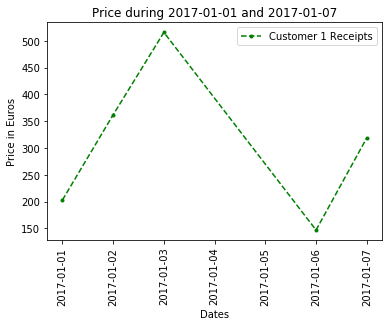

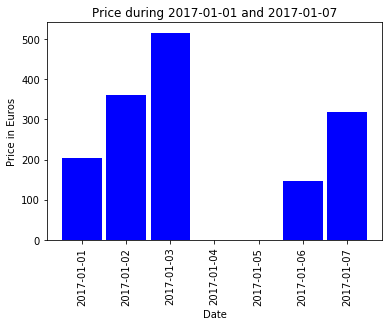

In [439]:
summary(df,TIME_START,TIME_END,0)